In [287]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [298]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  
            nn.Conv2d(6, 16, 5),       
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   
        )
        self.fc_model = nn.Sequential(
            nn.Linear(256,120),        
            nn.Tanh(),
            nn.Linear(120,84),         
            nn.Tanh(),
            nn.Linear(84,10)     ,
            nn.Softmax()
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
    
        x = x.view(x.size(0), -1)
       
        x = self.fc_model(x)
        return x

In [299]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [300]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [301]:
net =LeNet()

In [302]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 0/6, Test acc: 97.67, Train acc: 98.00
Epoch: 1/6, Test acc: 97.56, Train acc: 97.91
Epoch: 2/6, Test acc: 98.07, Train acc: 98.48
Epoch: 3/6, Test acc: 98.06, Train acc: 98.64
Epoch: 4/6, Test acc: 98.23, Train acc: 98.84
Epoch: 5/6, Test acc: 98.41, Train acc: 98.95


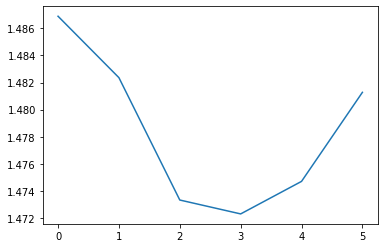

In [304]:
loss_arr = []
loss_epoch_arr = []
max_epochs = 6

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()